<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/fashion_mnist_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST convnets

## Import

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import VGG16

##Dataset

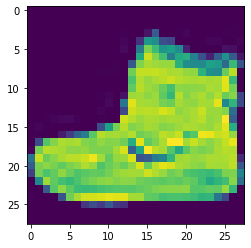

In [ ]:
# DATASET & PREPROCESSING - Fashion Mnist
# 60,000 28x28 grayscale images of 10 fashion categories

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Show img example
img = x_train[0]
plt.imshow(img)

# Processing data
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype("float32") / 255
y_train = keras.utils.to_categorical(y_train)

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype("float32") / 255
y_test = keras.utils.to_categorical(y_test)

# Split for validation set
x_val = x_train[:20000]
y_val = y_train[:20000]
x_train = x_train[20000:]
y_train = y_train[20000:]

##Model


In [ ]:
# MODEL DEFINITION

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(
    16, (3, 3), 
    activation="relu",
    padding="same",
    input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.BatchNormalization(renorm=True))
model.add(keras.layers.Conv2D(
    32, (2, 2), 
    activation="relu",
    padding="same"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.BatchNormalization(renorm=True))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Bat  (None, 14, 14, 16)       112       
 chNormalization)                                                
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                     

##Training

In [ ]:
# TRAINING

epochs = 15
history = model.fit(
    x_train, y_train, 
    validation_data=(x_val, y_val), 
    epochs=epochs, 
    batch_size=16)

Epoch 1/15
2500/2500 [==============================] - 118s 18ms/step - loss: 0.5088 - accuracy: 0.8403 - val_loss: 0.3133 - val_accuracy: 0.8882
Epoch 2/15
2500/2500 [==============================] - 45s 18ms/step - loss: 0.3068 - accuracy: 0.8889 - val_loss: 0.3090 - val_accuracy: 0.8898
Epoch 3/15
2500/2500 [==============================] - 45s 18ms/step - loss: 0.2637 - accuracy: 0.9039 - val_loss: 0.2939 - val_accuracy: 0.8976
Epoch 4/15
2500/2500 [==============================] - 45s 18ms/step - loss: 0.2335 - accuracy: 0.9136 - val_loss: 0.2760 - val_accuracy: 0.9036
Epoch 5/15
2500/2500 [==============================] - 46s 18ms/step - loss: 0.2079 - accuracy: 0.9242 - val_loss: 0.2842 - val_accuracy: 0.9085
Epoch 6/15
2500/2500 [==============================] - 46s 18ms/step - loss: 0.1878 - accuracy: 0.9323 - val_loss: 0.2923 - val_accuracy: 0.9102
Epoch 7/15
2500/2500 [==============================] - 45s 18ms/step - loss: 0.1687 - accuracy: 0.9378 - val_loss: 0.3019 

##Results

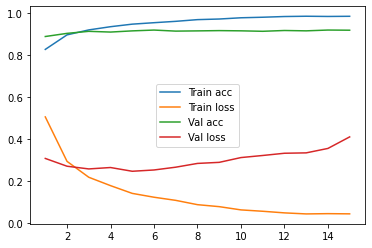

In [ ]:
# LOG RESULTS

epochs_range = range(1, epochs + 1)
history_dict = history.history

loss = history_dict['loss']
acc = history_dict['accuracy']

val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

plt.plot(epochs_range, acc, label="Train acc")
plt.plot(epochs_range, loss, label="Train loss")
plt.plot(epochs_range, val_acc, label="Val acc")
plt.plot(epochs_range, val_loss, label="Val loss")

plt.legend()
plt.show()

In [ ]:
# EVALUATION

score = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(score)

313/313 [==============================] - 3s 9ms/step - loss: 0.4535 - accuracy: 0.9155
['loss', 'accuracy']
[0.45353877544403076, 0.9154999852180481]
